Vader: 
*   This uses a "bag of words" approach:
*   Stop words are removed
*   Each word is scored and combined to a total score.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('vader_lexicon')

# Read in the data
df = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/DuringCovidDepressionRedditData.csv')
df = df.reset_index().rename(columns={'index': 'ID'})

print(df.shape)
df = df.head(500)
print(df.shape)

df.head()

(294, 9)
(294, 9)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/willjohnston/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ID,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,depression,I hate that people don’t understand that i don...,NaN,Yeah. It would be nice to just disappear for a...,4725,133,2020-08-04 01:57:38,i3ajk8
1,1,depression,"It’s like I died at 15, but my body just kept ...",I’m trapped inside. Does anyone else get that ...,I stopped living at 17. I know how you feel. T...,4183,203,2020-04-28 13:40:28,g9ndgw
2,2,depression,When you become closed off due to depression a...,Fuck 😃,[deleted],3786,95,2020-09-26 14:58:05,j07hbh
3,3,depression,The scary part about having depression is when...,Basically what the title says and my current s...,Everytime things gets better i feel that every...,3765,75,2020-02-21 10:06:06,f791jw
4,4,depression,People that aren't depressed exist and it's fu...,Like ???\n\n\nI posted on AskReddit asking non...,can you imagine waking up happy and being exci...,3601,128,2020-05-11 00:51:44,ghdi7l


In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
# Run the polarity score on the entire dataset
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = str(row['Title'])
    content = str(row['Content'])
    
    resTitle[i] = sia.polarity_scores(title)
    resContent[i] = sia.polarity_scores(content)

  0%|          | 0/294 [00:00<?, ?it/s]

In [23]:
vadersTitle = pd.DataFrame(resTitle).T
vadersTitle = vadersTitle.reset_index().rename(columns={'index': 'ID'})
vadersTitle = vadersTitle.merge(df, on='ID', how='left')
vadersTitle.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.316,0.489,0.195,-0.7351,depression,I hate that people don’t understand that i don...,NaN,Yeah. It would be nice to just disappear for a...,4725,133,2020-08-04 01:57:38,i3ajk8
1,1,0.164,0.712,0.125,-0.1406,depression,"It’s like I died at 15, but my body just kept ...",I’m trapped inside. Does anyone else get that ...,I stopped living at 17. I know how you feel. T...,4183,203,2020-04-28 13:40:28,g9ndgw
2,2,0.157,0.703,0.141,0.0535,depression,When you become closed off due to depression a...,Fuck 😃,[deleted],3786,95,2020-09-26 14:58:05,j07hbh
3,3,0.249,0.751,0.000,-0.8074,depression,The scary part about having depression is when...,Basically what the title says and my current s...,Everytime things gets better i feel that every...,3765,75,2020-02-21 10:06:06,f791jw
4,4,0.187,0.625,0.188,0.0005,depression,People that aren't depressed exist and it's fu...,Like ???\n\n\nI posted on AskReddit asking non...,can you imagine waking up happy and being exci...,3601,128,2020-05-11 00:51:44,ghdi7l


In [24]:
vadersContent = pd.DataFrame(resContent).T
vadersContent = vadersContent.reset_index().rename(columns={'index': 'ID'})
vadersContent = vadersContent.merge(df, on='ID', how='left')
vadersContent.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.000,1.000,0.000,0.0000,depression,I hate that people don’t understand that i don...,NaN,Yeah. It would be nice to just disappear for a...,4725,133,2020-08-04 01:57:38,i3ajk8
1,1,0.189,0.631,0.180,-0.0772,depression,"It’s like I died at 15, but my body just kept ...",I’m trapped inside. Does anyone else get that ...,I stopped living at 17. I know how you feel. T...,4183,203,2020-04-28 13:40:28,g9ndgw
2,2,1.000,0.000,0.000,-0.5423,depression,When you become closed off due to depression a...,Fuck 😃,[deleted],3786,95,2020-09-26 14:58:05,j07hbh
3,3,0.000,1.000,0.000,0.0000,depression,The scary part about having depression is when...,Basically what the title says and my current s...,Everytime things gets better i feel that every...,3765,75,2020-02-21 10:06:06,f791jw
4,4,0.143,0.660,0.197,0.8729,depression,People that aren't depressed exist and it's fu...,Like ???\n\n\nI posted on AskReddit asking non...,can you imagine waking up happy and being exci...,3601,128,2020-05-11 00:51:44,ghdi7l


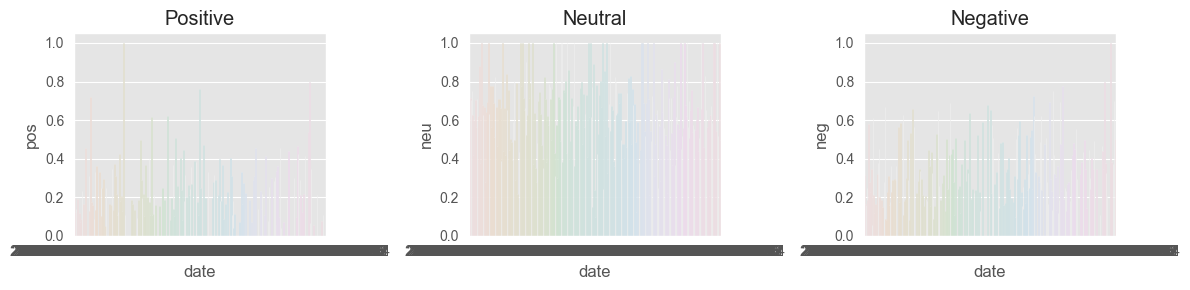

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersTitle, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersTitle, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersTitle, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

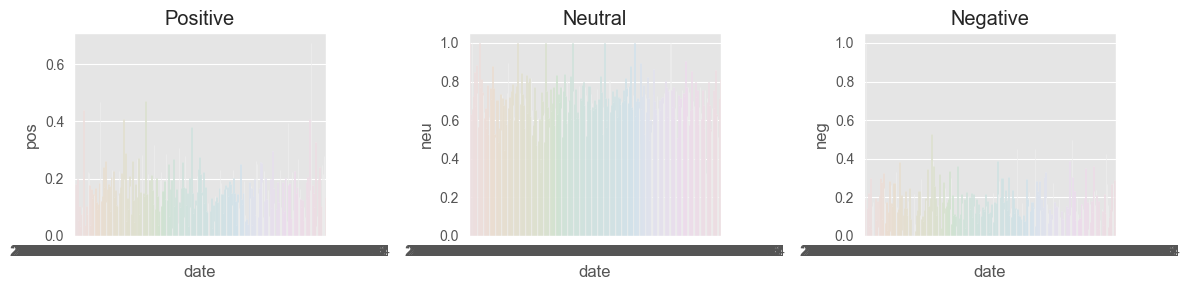

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersContent, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersContent, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersContent, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Huggingface Roberta Transformers: https://huggingface.co/docs/transformers/model_doc/roberta

Roberta Pretrained Model:
*   A model trained from a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [27]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
# Run for Roberta Model
robertaTitle = {}
robertaContent = {}
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        title = str(row['Title'])

        vader_title_result = sia.polarity_scores(title)
        vader_title_result_rename = {}

        for key, value in vader_title_result.items():
            vader_title_result_rename[f"vader_{key}"] = value
            
        roberta_title_result = polarity_scores_roberta(title)
        robertaTitle[i] = roberta_title_result
        resTitle[i] = {**vader_title_result_rename, **roberta_title_result}

    except RuntimeError:
        print(f'Broke for Title id {i}')

    try:
        content = str(row['Content'])

        vader_content_result = sia.polarity_scores(content)
        vader_content_result_rename = {}

        for key, value in vader_content_result.items():
            vader_content_result_rename[f"vader_{key}"] = value
            
        roberta_content_result = polarity_scores_roberta(content)
        robertaContent[i] = roberta_content_result
        resContent[i] = {**vader_content_result_rename, **roberta_content_result}

    except RuntimeError:
        print(f'Broke for Content id {i}')

  0%|          | 0/294 [00:00<?, ?it/s]

Broke for Content id 15
Broke for Content id 25
Broke for Content id 28
Broke for Content id 65
Broke for Content id 77
Broke for Content id 128
Broke for Content id 135
Broke for Content id 141
Broke for Content id 179
Broke for Content id 183
Broke for Content id 197
Broke for Content id 233
Broke for Content id 241
Broke for Content id 251
Broke for Content id 277
Broke for Content id 278


In [31]:
robertaTitleDF = pd.DataFrame(robertaTitle).T
robertaTitleDF = robertaTitleDF.reset_index().rename(columns={'index': 'ID'})
robertaTitleDF = robertaTitleDF.merge(df, on='ID', how='left')
robertaTitleDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

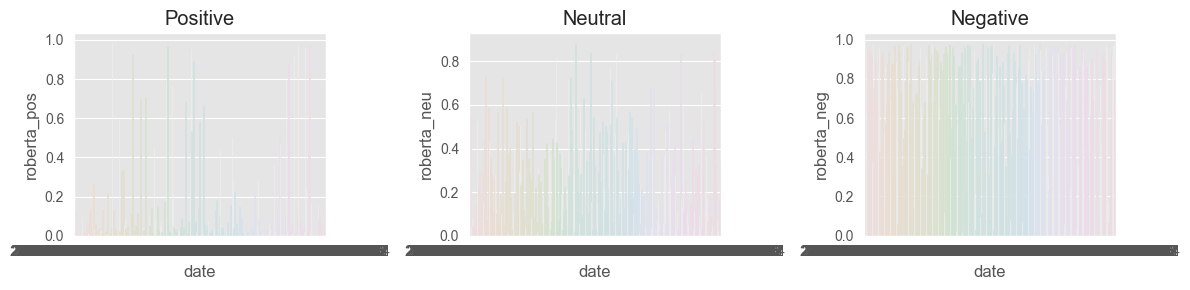

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [33]:
robertaContentDF = pd.DataFrame(robertaContent).T
robertaContentDF = robertaContentDF.reset_index().rename(columns={'index': 'ID'})
robertaContentDF = robertaContentDF.merge(df, on='ID', how='left')
robertaContentDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

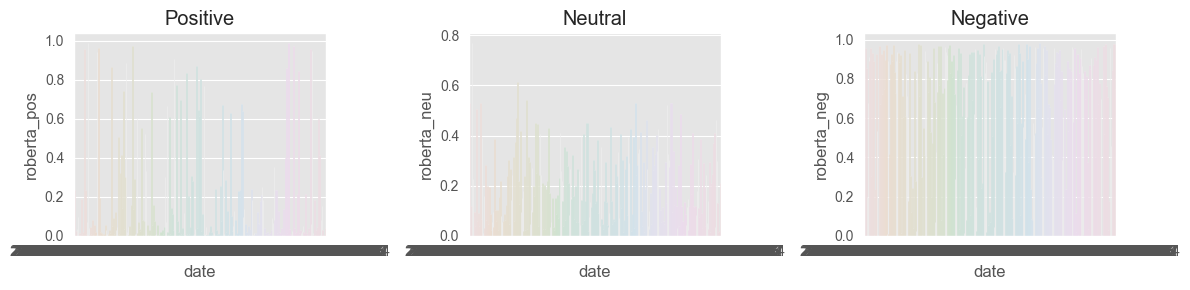

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [40]:
results_title_df = pd.DataFrame(resTitle).T
results_title_df = results_title_df.reset_index().rename(columns={'index': 'ID'})
results_title_df = results_title_df.merge(df, on='ID', how='left')
results_title_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

In [42]:
sns.pairplot(data=results_title_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()

In [ ]:
results_content_df = pd.DataFrame(resContent).T
results_content_df = results_content_df.reset_index().rename(columns={'index': 'ID'})
results_content_df = results_content_df.merge(df, on='ID', how='left')
results_content_df.columns

In [ ]:
sns.pairplot(data=results_content_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()